## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 8: Probability and Markov Processes
## Due December 10, 2024 by 11:59 PM
### <span style="color: red">Enrique Antunano</span>

Copyright &copy; 2024, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lectures 8 and 9. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Graph Theory.
- Most of the section on basic graph theory is from chapter one of

> Bollobas, [Modern Graph Theory](https://www.springer.com/gp/book/9780387984889).

- The spanning tree algorithm by Prim is from

> Gibbons, [Algorithmic Graph Theory](https://www.amazon.com/Algorithmic-Graph-Theory-Alan-Gibbons/dp/0521288819).

- Graphs as matrices is covered in

> Nica, [A Brief Introduction to Spectral Graph Theory](https://www.amazon.com/Introduction-Spectral-Theory-Textbooks-Mathematics/dp/3037191880/ref=sr_1_2?crid=3ETRQ8B0PW4EJ&keywords=spectral+graph+theory&qid=1573687537&s=books&sprefix=spectral+graph%2Cstripbooks%2C195&sr=1-2).

The consensus algorithm is described in [these notes](http://www.eeci-institute.eu/pdf/M010/Eeci-sp09_L4_graphtheory.pdf) by Richard Murray.

You will also need `networkx` which can be obtained [here](https://networkx.github.io/). If you are on Google CoLab, see [here](https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab) for how to install packages.

- Most of the section on probability is from chapter of the really, really, really good book:

> Feller, [An Introduction to Probability Theory and Its Applications, Vol 1](https://www.amazon.com/Introduction-Probability-Theory-Applications-Vol/dp/0471257087), 3rd Edition, Wiley, 1968.

- The material on Markov Chains can be found in numerous textbooks. A good online source is Chapter 11 of

> Grinstead, [Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/book.html).

In [19]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

## 1. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice.

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

In [2]:
dice_probs = {  1: 2/7,
                2: 1/7,
                3: 1/7,
                4: 1/7,
                5: 1/7,
                6: 1/7
}

In [3]:
def calc_weighted_die_prob(pairs_list,dice_prob):
    """Calculates the probability of a weighted dice role based on a list containing the possible die role variations"""

    for i in range(len(pairs_list)):
        first_dice_prob = dice_probs[pairs_list[i][0]]
        second_dice_prob = dice_probs[pairs_list[i][1]]
        dice_prob = dice_prob + (first_dice_prob*second_dice_prob)
    return dice_prob

In [4]:
# a)
sum_seven_prob = 0
sum_seven_pairs = [(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)]
sum_seven_prob = calc_weighted_die_prob(sum_seven_pairs,sum_seven_prob)
print("Probability of rolling a sum of seven: %f" % sum_seven_prob)

Probability of rolling a sum of seven: 0.163265


b) Probability of getting a sum of seven given that the first die comes up 1 is $\frac{1}{7}, the probability of rolling a 6 with the second die, the only value that can result in a sum of 7.

In [5]:
# c)
prob_die_is_not_one = 5/7
print("Probability neither die come up as 1: %f" % (prob_die_is_not_one**2))

Probability neither die come up as 1: 0.510204


In [6]:
# d)
def dice_pdf():
    all_dice_probs = [  0,0,0,0,
                        0,0,0,0,
                        0,0,0,0,
                        0,0,0 ]

    for i in range(6):
        for j in range(6):
            pair_prob = 0
            dice_pair = [((i+1),(j+1))]
            dice_roll_sum = ((i+1)+(j+1))
            pair_prob = calc_weighted_die_prob(dice_pair,pair_prob)
            all_dice_probs[dice_roll_sum] = all_dice_probs[dice_roll_sum] + pair_prob
    return all_dice_probs


In [7]:
dice_pdf_vals = dice_pdf()
print("PDF of the random variable $X$ defined to the the sum of the two dice: ", dice_pdf_vals)

sum_val = 0
for i in range(len(dice_pdf_vals)):
    sum_val = dice_pdf_vals[i] + sum_val
sum_val


PDF of the random variable $X$ defined to the the sum of the two dice:  [0, 0, 0.08163265306122448, 0.08163265306122448, 0.10204081632653061, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.1020408163265306, 0.08163265306122448, 0.061224489795918366, 0.04081632653061224, 0.02040816326530612, 0, 0]


0.9999999999999999

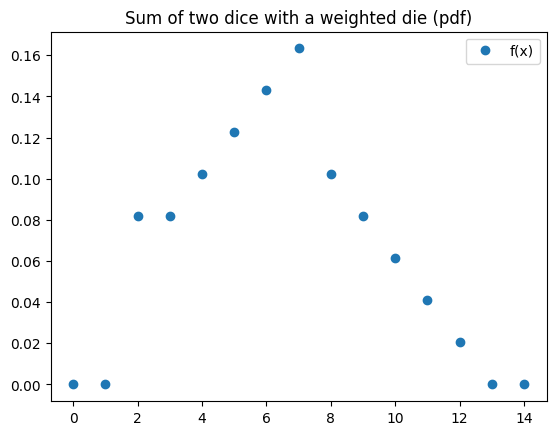

In [8]:
x = np.linspace(0,14,15);
PDF = dice_pdf_vals;
plt.plot(x,PDF, "o", label="f(x)")
plt.legend();
plt.title("Sum of two dice with a weighted die (pdf)");

## 2. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise.

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$.

Respones
a) <br>
$F_X(x) = P(X \leq x)$ <br>

for $x<0$: $F(x) = \int_{-\infty}^{x} 0 dt = 0$ <br>
for $0 \leq x \leq 1$: $F(x) = \int_{0}^{x} 1 dt = t |_0^x = x$ <br>
for $x>0$: $F(x) = \int_{-\infty}^{x} f(t) dt = 1$ <br>
 
$$ F(x) = \begin{cases} 
    0, &\text{for } x<0 \\
    x, &\text{for } 0 \leq x \leq 1 \\
    1, &\text{for } x>1
\end{cases}$$

b) 
$$F_Y(y) = P[Y \leq y] = P[X^2 \leq y] = P[-\sqrt{y} \leq X \leq \sqrt{y}]$$
$$ = P[X \leq \sqrt{y}]$$
$$ = F_X(\sqrt{y})$$

CDF, 
$$ F_Y(y) = \begin{cases} 
    0, &\text{for } y<0 \\
    \sqrt{y}, &\text{for } 0 \leq y \leq 1 \\
    1, &\text{for } y>1
\end{cases}$$

Compute the PDF,
$$ f_Y(y) = \begin{cases} 
    \frac{d}{dx} 0, &\text{for } y<0 \\
    \frac{d}{dx} \sqrt{y}, &\text{for } 0 \leq y \leq 1 \\
    \frac{d}{dx} 1, &\text{for } y>1
\end{cases}$$

PDF,
$$ f_Y(y) = \begin{cases}
    \frac{1}{2 \sqrt{y}}, &\text{for } 0 < y \leq 1 \\
    0, \text{ otherwise}
\end{cases}$$

In [62]:
# Setup functions
t = sm.var("t")
pdf_func = 1/(2*sm.sqrt(t))
pdf = sm.Piecewise((0,t<=0),(pdf_func,((t > 0) & (t <= 1))),(0,t>1))

cdf_func = sm.sqrt(t)
cdf = sm.Piecewise((0,t<0),(cdf_func,((t >= 0) & (t <= 1))),(1, t>1))

pdf_lam = sm.lambdify(t,pdf)
cdf_lam = sm.lambdify(t,cdf)

Text(0, 0.5, 'f(u) = $0$ for $t<0$, $\\sqrt{y}$ for $0 \\leq t \\leq 1$; $1$ for $t>0$')

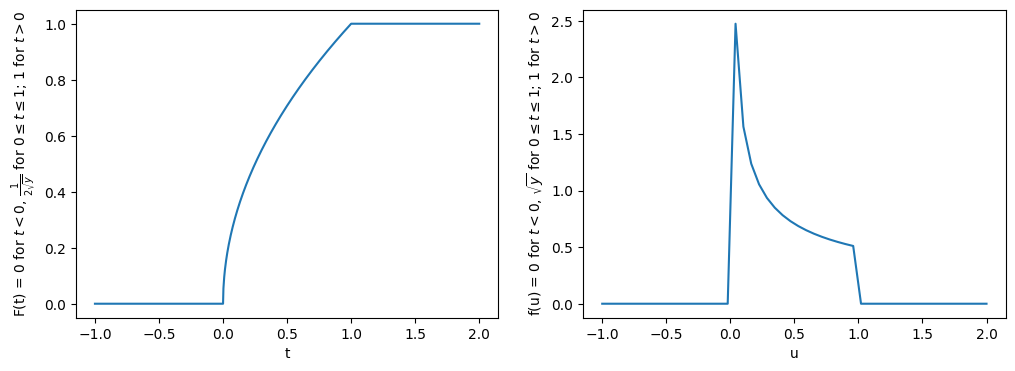

In [72]:
#plot
fig,ax=plt.subplots(1,2,figsize=(12,4))
t = np.linspace(-1.0,2.0,1000)
u = np.linspace(-1.0,2.0,50)
ax[0].plot(t,cdf_lam(t))
ax[0].set_xlabel("t")
ax[0].set_ylabel("F(t) = $0$ for $t<0$, $\\frac{1}{2 \sqrt{y}}$ for $0 \leq t \leq 1$; $1$ for $t>0$")
ax[1].plot(u,pdf_lam(u))
ax[1].set_xlabel("u")
ax[1].set_ylabel("f(u) = $0$ for $t<0$, $\sqrt{y}$ for $0 \leq t \leq 1$; $1$ for $t>0$")

## 3. PDF and CDF

Suppose that a random variable $X$ has PDF defined by

$$
f_X(x) = \left \{
\begin{array}{ll}
a(1+x) & \; \mathrm{if} \; -1 < x \leq 0 \\
a(1-x) & \; \mathrm{if} \; 0 < x < 1 \\
0 & \; \mathrm{otherwise}.
\end{array}
\right .
$$

a) What does the value of $a$ need to be to make $f_X$ a probability distribution? Plot $f_X$ for this value.

b) Find and plot $F_X$.

c) Find $b$ such that $P[X>b] = \frac{1}{2} P[X \leq b]$.

a) 
$$ 1 = \int_{-\infty}^{\infty} f_X(x) = a \int_{-1}^{0} (1+x) dx + a \int_{0}^{1} (1-x) dx $$
$$ = a (\frac{1}{2} + \frac{1}{2})$$
$$ = a$$

b)
$$ 1 = \int_{-\infty}^{\infty} f_X(x) = \int_{-1}^{t} (1+x) dx + \int_{0}^{t} (1-x) dx $$
$$ = (\frac{t^2 - 1}{2} + t + 1) + (-\frac{t^2}{2} + t)$$
<br><br>
$$
F_X(x) = \left \{
\begin{array}{ll}
\frac{x^2 - 1}{2} + x + 1 & \; \mathrm{if} \; -1 < x \leq 0 \\
-\frac{x^2}{2} + x + \frac{1}{2} & \; \mathrm{if} \; 0 < x < 1 \\
0 & \; \mathrm{otherwise}.
\end{array}
\right .
$$

The $\frac{1}{2}$ from $-\frac{x^2}{2} + x + \frac{1}{2}$ is from setting all x values in $\frac{x^2 - 1}{2} + x + 1$ to $0$ and solving.


In [83]:
# Plot a) and b)
# Setup functions
t = sm.var("t")
pdf_func1 = 1+t
pdf_func2 = 1-t
pdf = sm.Piecewise((0,t<=-1),(pdf_func1,((t > -1) & (t <= 0))),(pdf_func2,((t > 0) & (t < 1))),(0,t>=1))

cdf_func1 = ((((t**2)-1)/2) + t + 1)
cdf_func2 = (-((t**2)/2) + t + 0.5)
cdf = sm.Piecewise((0,t < -1),(cdf_func1,((t > -1) & (t <= 0))),(cdf_func2,((t > 0) & (t < 1))),(1, t> 1))

pdf_lam = sm.lambdify(t,pdf)
cdf_lam = sm.lambdify(t,cdf)

Text(0, 0.5, 'PDF f(u)')

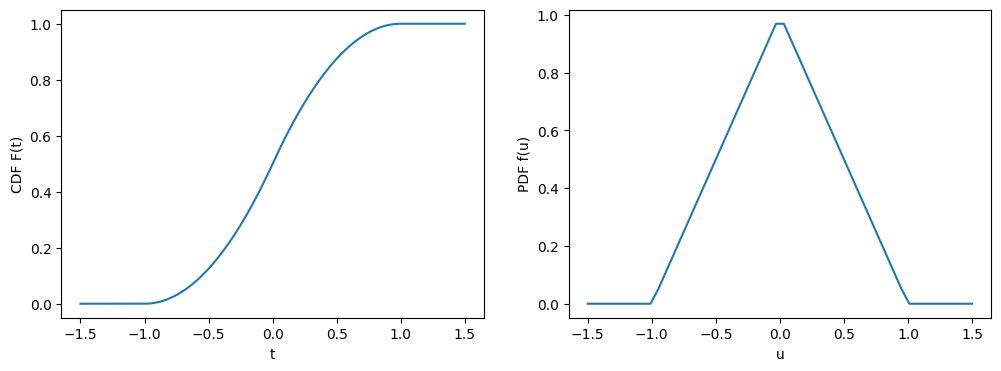

In [88]:
#plot
fig,ax=plt.subplots(1,2,figsize=(12,4))
t = np.linspace(-1.5,1.5,1000)
u = np.linspace(-1.5,1.5,50)
ax[0].plot(t,cdf_lam(t))
ax[0].set_xlabel("t")
ax[0].set_ylabel("CDF F(t)")
ax[1].plot(u,pdf_lam(u))
ax[1].set_xlabel("u")
ax[1].set_ylabel("PDF f(u)")

c)
$$1 = P[X>b] + P[X \leq b]$$
$$ = \frac{1}{2} P[X \leq b] + P[X \leq b]$$
$$ = \frac{3}{2} P[X \leq b]$$
$$ \frac{2}{3} = P[X \leq b]$$
<br><br>
Since probability is above 50%, $b$ must be greater than $0$ but less than $1$. 
$$ \frac{2}{3} = -\frac{b^2}{2} + b + \frac{1}{2} $$
$$ b = 0.1835$$
<br><br>

## 4. Markov Process Properties

Consider the three Markov Processes depicted here:
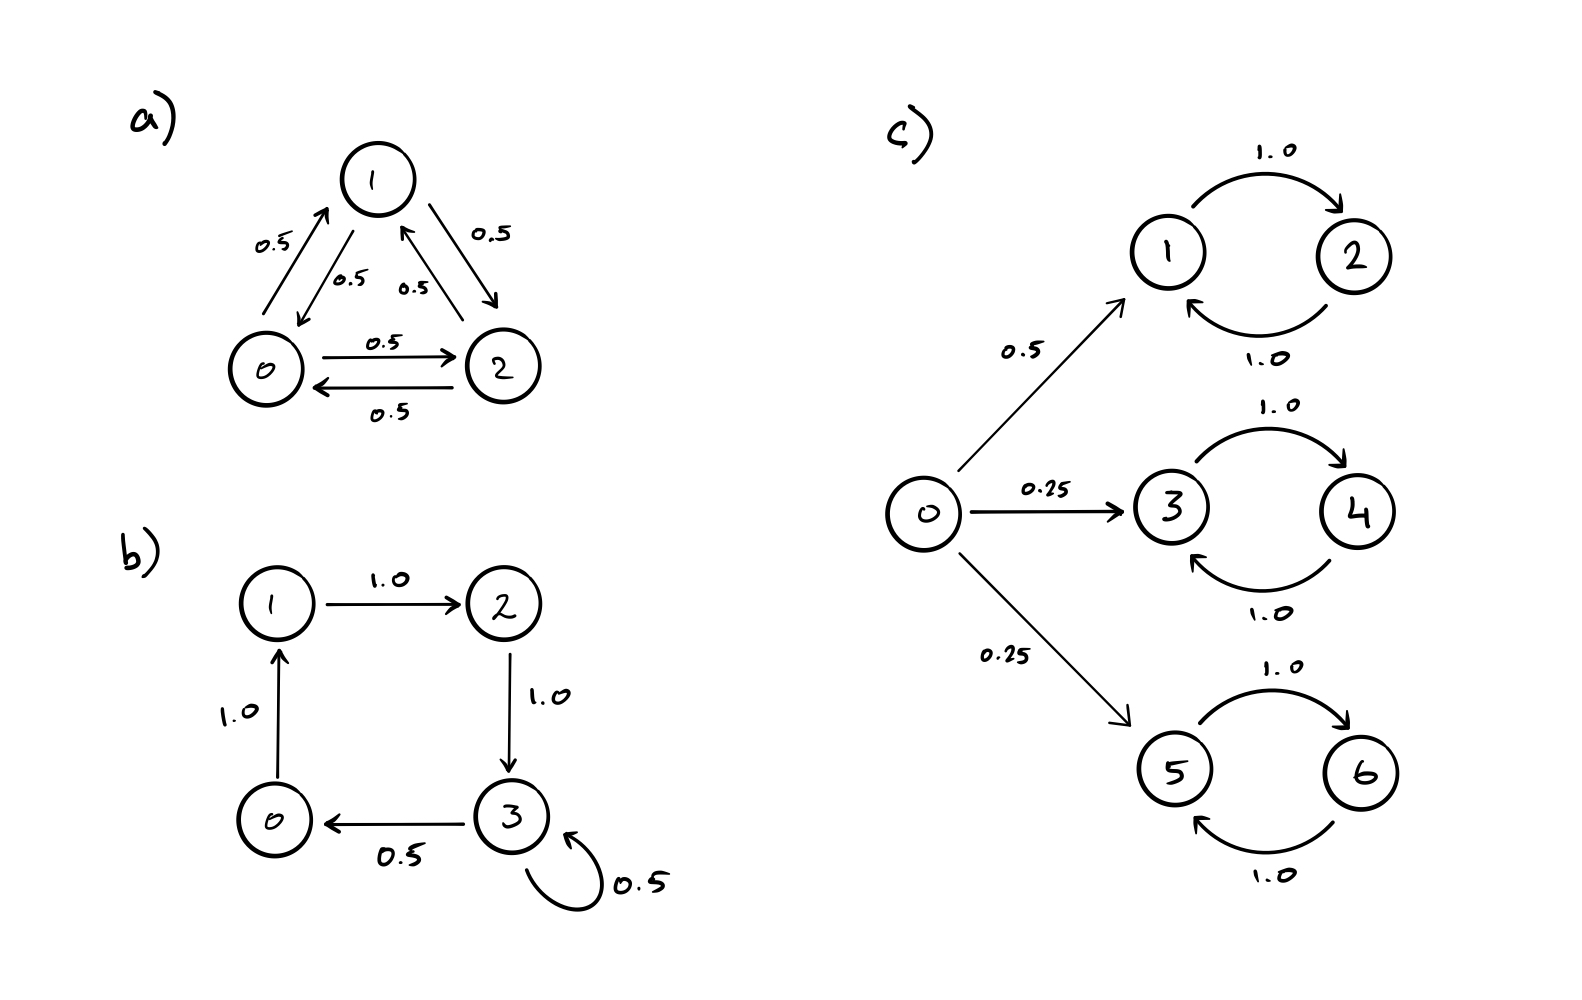

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

a) <br>
i) All states are aperiodic because there's a nonzero chance that a state may never be returned to. Additionally, if a state does return to $x$, it does not have to be returned to in $mk$ steps. <br>
ii) All states are recurrent. <br>
iii) The system is irreducible. <br>
iv) All states are NOT ergodic. 

b) <br>
i) All states are aperiodic. <br>
ii) All states are recurrent. <br>
iii) The system is irreducible. <br>
vi) States 0,1,2 are NOT ergodic. State 3 is ergodic.

c) <br>
i) State 0 is aperiodic. States 1,2,3,4,5,6 all have period 2. <br>
ii) State 0 is a transient state. <br>
iii) The following subsets [(1,2),(3,4),(5,6)] are absorbing. <br>
iv) State 0 is NOT ergodic.

## 5. Stationary Distributions

For each Markov Process in Problem 4:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this).